In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from shapely.geometry import Point, MultiPoint, Polygon
import geopandas
import geodatasets
import folium


In [ ]:
airbnb = pd.read_csv('NYC_Airbnb.csv')
airbnb.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_50980\2472506604.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('NYC_Airbnb.csv')


id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20220603182654   2022-06-04   
1  5121  https://www.airbnb.com/rooms/5121  20220603182654   2022-06-04   
2  5136  https://www.airbnb.com/rooms/5136  20220603182654   2022-06-04   
3  5178  https://www.airbnb.com/rooms/5178  20220603182654   2022-06-04   
4  5203  https://www.airbnb.com/rooms/5203  20220603182654   2022-06-03   

                                       name  \
0                     Skylit Midtown Castle   
1                           BlissArtsSpace!   
2  Spacious Brooklyn Duplex, Patio + Garden   
3          Large Furnished Room Near B'way　   
4        Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  One room available for rent in a 2 bedroom apt...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1                                                NaN   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
2  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        4.79   
1  https://www.airbnb.com/users/show/7356  ...                        4.91   
2  https://www.airbnb.com/users/show/7378  ...                        5.00   
3  https://www.airbnb.com/users/show/8967  ...                        4.44   
4  https://www.airbnb.com/users/show/7490  ...                        4.95   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.86                4.41     NaN                f   
1                   4.47                4.52     NaN                f   
2                   4.50                5.00     NaN                f   
3                   4.87                4.39     NaN                f   
4                   4.94                4.92     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              3                                           3   
1                              2                                           0   
2                              1                                           1   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            2   
2                                            0   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.31  
1                                           0              0.32  
2                                           0              0.02  
3                                           0              3.37  
4                                           0              0.76  

[5 rows x 74 columns]

In [ ]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
# filter listings
cols = ['id', 'listing_url', 'name', 'latitude', 'longitude', 'last_scraped','host_id', 'host_name', 'host_listings_count', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
nyc = airbnb[cols]

# convert price to float type
nyc['price'] = nyc['price'].str.replace('$', '').str.replace(',', '').astype(float)

print(nyc.columns)


Index(['id', 'listing_url', 'name', 'latitude', 'longitude', 'last_scraped',
       'host_id', 'host_name', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


C:\Users\jonat\AppData\Local\Temp\ipykernel_50980\3867041645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['price'] = nyc['price'].str.replace('$', '').str.replace(',', '').astype(float)


## Data Description

TODO

## Data Visualizations

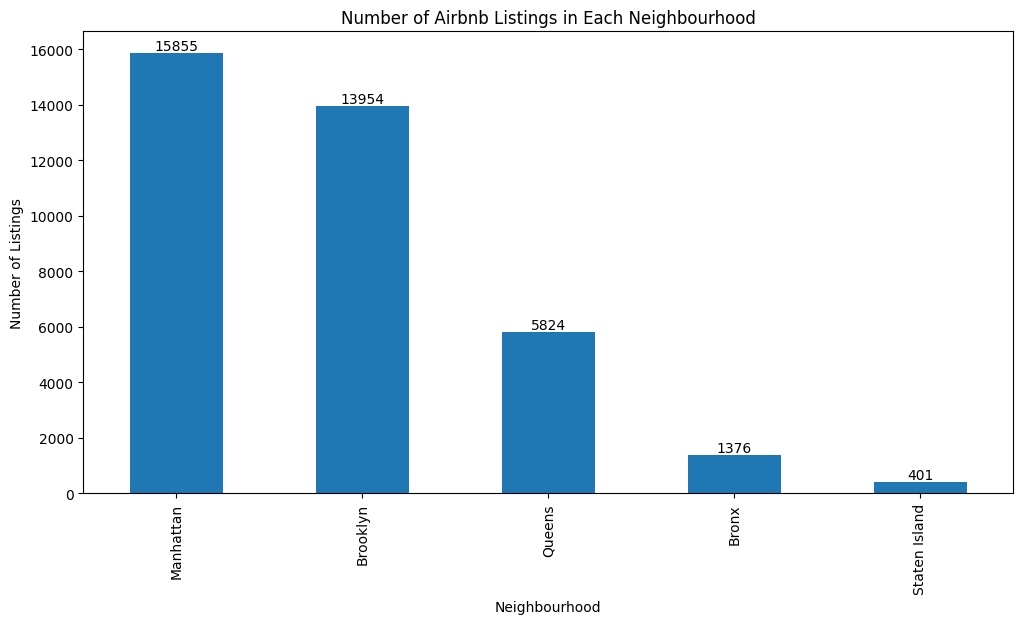

In [ ]:
# Bar Chart of Neighbourhoods
plt.figure(figsize=(12, 6))
nyc['neighbourhood_group_cleansed'].value_counts().plot(kind='bar')

# Add value labels to each column
for i, v in enumerate(nyc['neighbourhood_group_cleansed'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings in Each Neighbourhood')
plt.show()


The bar chart illustrates the distribution of Airbnb listings across different neighborhoods in New York City. The x-axis represents the neighborhoods, while the y-axis indicates the number of listings. Manhattan appears to have the highest number of listings, followed by Brooklyn, Queens, the Bronx, and Staten Island, in descending order. Each bar is labeled with its corresponding numerical value to provide a clearer understanding of the distribution. Overall, the visualization provides insight into the popularity of various neighborhoods among Airbnb hosts in New York City.

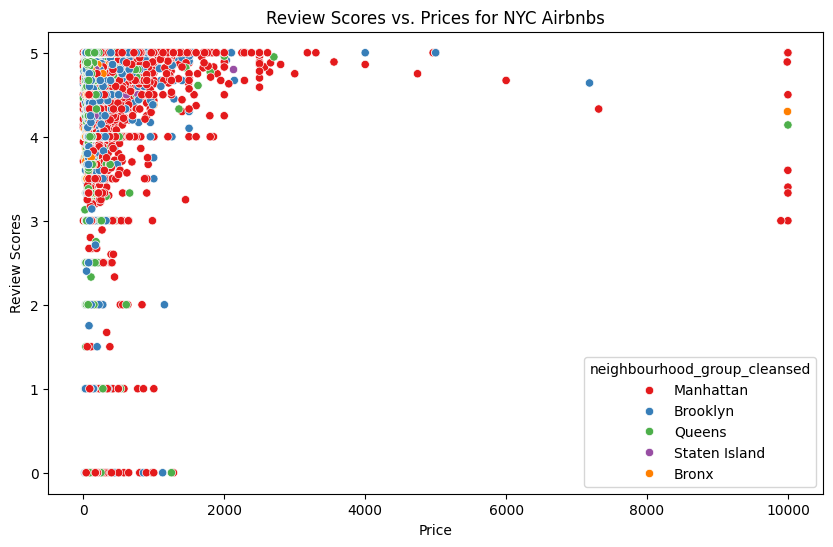

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nyc, y='review_scores_rating', x='price', hue='neighbourhood_group_cleansed', palette='Set1')
plt.ylabel('Review Scores')
plt.xlabel('Price')
plt.title('Review Scores vs. Prices for NYC Airbnbs')
plt.show()


The scatter plot above presents a visual comparison of review scores and prices for Airbnb listings across various neighborhoods in New York City, offering valuable insights to customers seeking accommodations. Each data point represents a listing, with its position on the plot indicating both its review score and price. The color of the data points corresponds to the neighborhood in which the listing is located, allowing customers to discern trends and differences among neighborhoods. By examining this visualization, customers can quickly identify potential correlations between review scores and prices, aiding them in making informed decisions about their lodging options.

In [ ]:
import altair as alt

# Calculate average price by neighbourhood
average_price = nyc.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

# Sort by price in descending order
average_price = average_price.sort_values('price', ascending=False)

# Create a bar chart
bar = alt.Chart(average_price).mark_bar().encode(
    x=alt.X('neighbourhood_group_cleansed:N', title='Neighborhood', sort='-y'),
    y=alt.Y('price:Q', title='Average Price ($)'),
)

# Create text labels
text = bar.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text=alt.Text('price:Q', format='.2f')
)

# Layer the bar and text marks
chart = (bar + text).properties(
    title='Average Price by Neighborhood',
    width=600,  
    height=400 
)

chart.display()

alt.LayerChart(...)

The bar chart illustrates the average price of Airbnb listings in different neighborhoods of New York City. The x-axis represents the neighborhoods, while the y-axis indicates the average price. The neighborhoods are sorted in descending order based on their average prices. Manhattan appears to have the highest average price, followed by Brooklyn, Queens, Staten Island, and the Bronx. The visualization provides insight into the variation in pricing across different neighborhoods, aiding potential Airbnb guests in making informed decisions based on their budget and preferences.

In [ ]:
import numpy as np

# Select a random sample of 5000 rows
nyc_sample = nyc.sample(5000)

# Only select listings with prices less than $3,000
subset_nyc_sample = nyc_sample[nyc_sample['price'] < 3000]

# Setup dropdown menu
options = [None, 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room']
labels = ['All', 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

custom_color_map = alt.Scale(domain=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
                              range=['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c'])

input_dropdown = alt.binding_radio(options = options,
                                    labels = labels,
                                    name = 'Room Type: ')

selection = alt.selection_point(fields = ['room_type'], bind = input_dropdown)

scatter_plot = alt.Chart(subset_nyc_sample).mark_circle().encode(
    x=alt.X('price:Q', title='Price ($)'),
    y=alt.Y('number_of_reviews:Q', title='Number of Reviews'),
    color=alt.Color('room_type:N', scale=custom_color_map)
).properties(
    title='Price vs. Number of Reviews for NYC Airbnbs (Prices < $3,000)',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).add_params(
    selection
).transform_filter(
    selection
)

scatter_plot


alt.Chart(...)

The scatter plot illustrates the relationship between price and the number of reviews for a random sample of 5000 Airbnb listings in NYC. Each circle represents a listing, with its position indicating its price and number of reviews. The color of the circles represents different room types. The visualization suggests that there is no clear correlation between price and the number of reviews, with variations observed across different room types. This visualization allows customers to assess listing value and popularity by correlating price with the number of reviews. Color coding for room types helps customers find accommodations that match their preferences and needs. Overall, it empowers customers to choose listings aligned with their budget, preferences, and desired popularity level, enhancing their NYC experience.

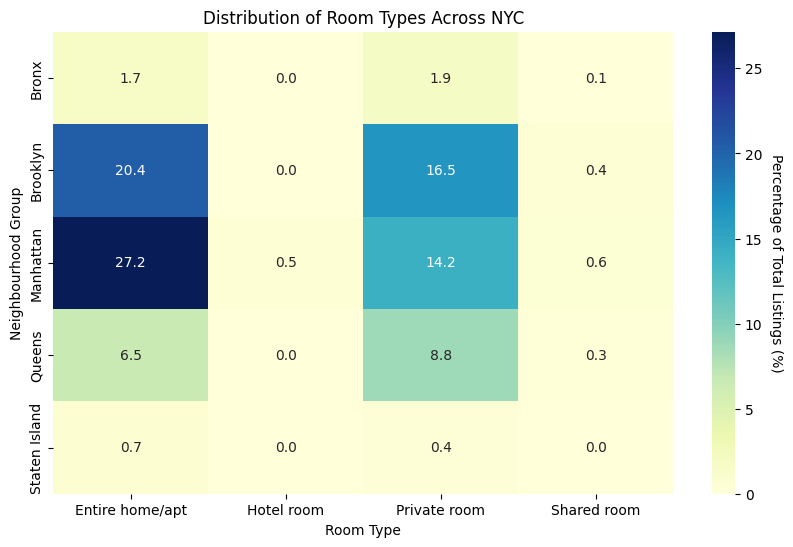

In [ ]:
# heatmap:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table to summarize the data
room_distribution = nyc.pivot_table(index='neighbourhood_group_cleansed', columns='room_type', aggfunc='size', fill_value=0)

# Calculate the total number of listings
total_listings = room_distribution.values.sum()

# Calculate the percentages
room_distribution_percentages = room_distribution / total_listings * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(room_distribution_percentages, annot=True, fmt='.1f', cmap='YlGnBu')

plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.title('Distribution of Room Types Across NYC')

# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Set the label for the colorbar
cbar.set_label('Percentage of Total Listings (%)', rotation=270, labelpad=15)

The heatmap offers guests valuable insights into the diverse range of room types available across New York City's neighborhoods. Each cell in the heatmap represents a combination of room type and neighborhood, with the presence of a mark indicating the count of listings with that specific room type in the corresponding neighborhood. The x-axis denotes different room types, while the y-axis represents neighborhood groups, offering spatial organization for identifying room type distribution. The color of each cell encodes the count of listings, with darker shades indicating higher counts and lighter shades representing lower counts, facilitating quick perception of room type frequencies. Numeric annotations within cells provide precise quantitative information, supplementing the visual encoding with exact counts of listings.

By showcasing the prevalence of entire homes/apartments, private rooms, and shared spaces within different areas, it helps guests align their accommodation preferences with neighborhood offerings. This information empowers guests to make informed decisions, allowing them to find accommodations that best suit their needs, preferences, and budget. Whether seeking a spacious retreat or a budget-friendly option, the heatmap provides a comprehensive overview of room type availability, facilitating a seamless and tailored experience for guests navigating NYC's lodging landscape.

<Figure size 1200x600 with 0 Axes>

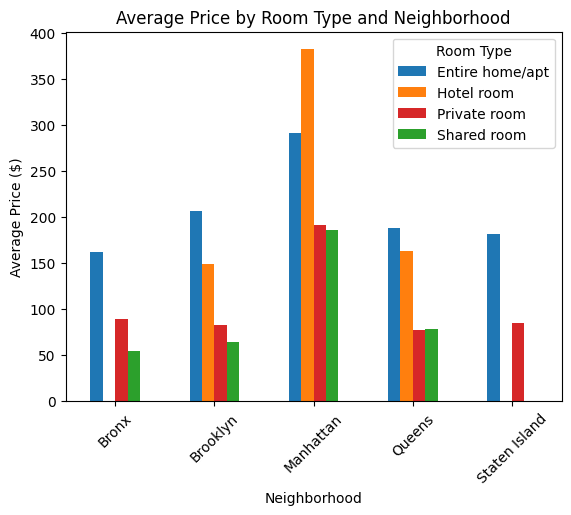

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table to summarize the data
price_by_room_neighborhood = nyc.pivot_table(index='neighbourhood_group_cleansed', columns='room_type', values='price', aggfunc='mean')

# Define the color mapping
color_dict = {'Private room': '#d62728', 'Shared room': '#2ca02c', 'Hotel room': '#ff7f0e', 'Entire home/apt': '#1f77b4'}

# Plot the bar chart
plt.figure(figsize=(12, 6))
price_by_room_neighborhood.plot(kind='bar', rot=45, color=[color_dict[i] for i in price_by_room_neighborhood.columns])
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Room Type and Neighborhood')
plt.legend(title='Room Type')
plt.show()

The bar plot displays average prices of different room types across New York City neighborhoods, offering customers valuable insights for their accommodation choices. It highlights significant price variations among neighborhoods and provides clarity on preferred room types within each area. Each bar represents the average price of a room type within a neighborhood, serving as marks that highlight price variations among neighborhoods. The x-axis denotes different neighborhoods, acting as a positional channel to organize the data spatially. The y-axis represents average prices, facilitating comparisons across room types and neighborhoods. This visual encoding enables customers to easily identify budget-friendly options and understand market trends, empowering them to make informed decisions tailored to their preferences and budget constraints during their stay in New York City.

## Chloropleth map showing averages of neighbourhoods

In [ ]:

# add shapely points to the nyc dataset
nyc_geo = nyc.copy()
nyc_geo['geometry'] = [Point(xy) for xy in zip(nyc['longitude'],
                                                 nyc['latitude'])]
nyc_geo = geopandas.GeoDataFrame(nyc_geo)
nyc_geo.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            37410 non-null  int64   
 1   listing_url                   37410 non-null  object  
 2   name                          37396 non-null  object  
 3   latitude                      37410 non-null  float64 
 4   longitude                     37410 non-null  float64 
 5   last_scraped                  37410 non-null  object  
 6   host_id                       37410 non-null  int64   
 7   host_name                     37344 non-null  object  
 8   host_listings_count           37344 non-null  float64 
 9   neighbourhood_cleansed        37410 non-null  object  
 10  neighbourhood_group_cleansed  37410 non-null  object  
 11  room_type                     37410 non-null  object  
 12  accommodates                  37410 no

In [ ]:
# Group by neighbourhood and calculate average price and review score
grouped = nyc_geo.groupby('neighbourhood_cleansed').agg({'price': 'mean', 'review_scores_rating': 'mean'})

# Merge the aggregated data with the original geometry data
merged_gdf = nyc_geo.merge(grouped, left_on='neighbourhood_cleansed', right_index=True)

# Create a list to store the polygons
polygons = []

# Iterate over groups
for neighbourhood_cleansed, group in merged_gdf.groupby('neighbourhood_cleansed'):
    # Combine points into a MultiPoint
    multi_point = MultiPoint(list(group['geometry']))
    # Create a convex hull polygon
    polygon = multi_point.convex_hull
    # Add neighbourhood, average price, and average review score information to the polygon
    polygon = geopandas.GeoDataFrame({
        'Neighborhood': [neighbourhood_cleansed],
        'Average Price': [group['price_y'].mean().round(2)], 
        'Average Review Score': [group['review_scores_rating_y'].mean().round(1)], 
        'geometry': [polygon]
    })
    polygons.append(polygon)

# Combine polygons into one GeoDataFrame
neighborhood_polygons = pd.concat(polygons, ignore_index=True)


AttributeError: 'float' object has no attribute 'round'

In [ ]:
# explore
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='OpenStreetMap')

neighborhood_polygons.explore(
    m=m,
    column='Average Price',
    cmap='inferno',
    tooltip=['Neighborhood'],
    popup=['Neighborhood', 'Average Price', 'Average Review Score'],
    legend=True,
    name='Neighborhoods'
)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Average Price and Review Scores of Airbnbs in Different NYC Neighborhoods</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(m)
m